In [63]:
from data_sampler import WeightedSampler
from dataset import CARLADataset, CARLADatasetMultiProcessing
from data_preprocessing import preprocessing
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile, ZIP_DEFLATED

from tqdm import tqdm

In [64]:
path_data = os.path.join("..", "data", "Dataset Ege")
# path_data = os.path.join("..", "data", "data")

config = {"used_inputs": ["rgb", "measurements"], 
        "used_measurements": ["speed", "steer", "throttle"],
        "seq_len": 1
        }

dataset = CARLADataset(root_dir=path_data, config=config)
# dataset_mp = CARLADatasetMultiProcessing(root_dir=path_data, config=config)
weighted_sampler = WeightedSampler(dataset=dataset)
print(dataset.__len__())

Varying number files among input types: ../data/Dataset Ege/Town10HD_Scenario10_route16_11_28_18_26_19/rgb_prep
217


In [65]:
dl = DataLoader(dataset=dataset, batch_size=16, num_workers=0, sampler=weighted_sampler)
# dl_mp = DataLoader(dataset=dataset_mp, batch_size=16, num_workers=3, sampler=weighted_sampler)

In [66]:
b = next(iter(dl))

In [67]:
count = 0
for batch in tqdm(dl):
    count += 1
print(count)

100%|██████████| 14/14 [00:01<00:00, 10.25it/s]

14


In [71]:
batch["rgb"].shape

torch.Size([9, 1, 3, 160, 960])

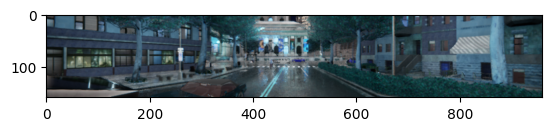

In [70]:
plt.imshow(batch["rgb"][0, 0].reshape(160, 960, 3)/255)

In [76]:
# Convert the tensor to a PIL image
img_pil = transforms.ToPILImage()(batch["rgb"][0, 0]/255)

# Display the image
img_pil.show()

In [52]:
count = 0
for batch in dl:
    # preprocessing
    for key in preprocessing:
        batch[key] = preprocessing[key](batch[key])
    count += 1
print(count)

14


In [55]:
batch["rgb"].shape

torch.Size([9, 1, 3, 160, 960])

TypeError: Invalid shape (3, 160, 960) for image data

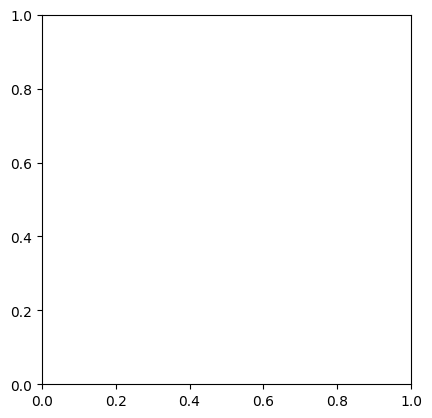

In [18]:
plt.imshow(img_np)

In [8]:
dataset.df_meta_data.apply(lambda x: os.path.join(x["dir"], "rgb", x["rgb"]), axis=1).apply(dataset.load_data_from_path)

0      [[[54, 52, 61, 40, 52, 65, 46, 55, 71, 62, 141...
1      [[[41, 36, 34, 34, 41, 54, 43, 50, 64, 48, 53,...
2      [[[24, 25, 33, 23, 40, 62, 39, 53, 74, 44, 53,...
3      [[[45, 40, 38, 37, 46, 60, 50, 56, 73, 54, 57,...
4      [[[17, 23, 29, 28, 38, 57, 34, 48, 68, 36, 47,...
                             ...                        
212    [[[15, 14, 14, 20, 16, 14, 18, 19, 18, 29, 24,...
213    [[[11, 18, 21, 17, 19, 18, 11, 20, 22, 24, 26,...
214    [[[10, 9, 9, 10, 9, 9, 11, 12, 12, 17, 15, 15,...
215    [[[43, 42, 43, 49, 49, 50, 58, 54, 54, 58, 64,...
216    [[[8, 8, 7, 10, 8, 8, 9, 10, 10, 15, 13, 13, 1...
Length: 217, dtype: object